Data Description:
          Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000 

Missing Values:
 Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64 

Data after Replacing Missing Values with Mean:
      Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110

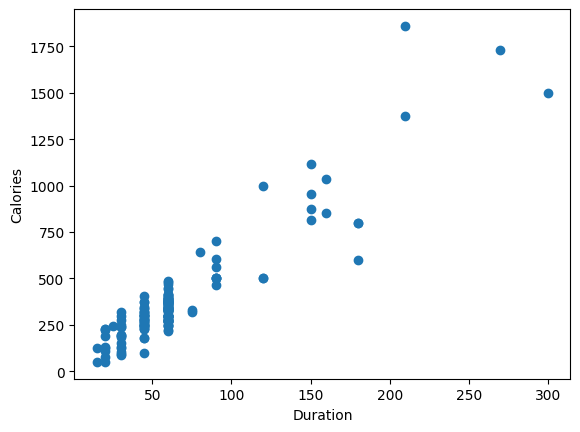

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# a. Read the provided CSV file ‘data.csv’.
df = pd.read_csv(r"C:\Users\15014\Documents\GitHub\NNDL - assignment -4\data.csv")

# c. Show the basic statistical description about the data 
print("Data Description:\n", df.describe(), "\n")

# d. Check if the data has null values 
print("Missing Values:\n", df.isnull().sum(), "\n")

# i. Replace the null values with the mean 
df.fillna(df.mean(), inplace=True)
print("Data after Replacing Missing Values with Mean:\n", df, "\n")

# e. Select at least two columns and aggregate the data using: min, max, count, mean 
selected_cols = ['Calories', 'Pulse']
grouped = df[selected_cols].agg(['min', 'max', 'count', 'mean'])
print("Aggregated Data:\n", grouped, "\n")

# f. Filter the dataframe to select the rows with calories values between 500 and 1000 
filtered_df = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print("Data with Calorie values between 500 and 1000:\n", filtered_df, "\n")

# g. Filter the dataframe to select the rows with calories values > 500 and pulse < 100 
filtered_df = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print("Data with Calorie values > 500 and Pulse < 100:\n", filtered_df, "\n")

# h. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse” 
df_modified = df.drop(['Maxpulse'], axis=1)
print("Modified Dataframe without Maxpulse Column:\n", df_modified, "\n")

# i. Delete the “Maxpulse” column from the main df dataframe 
df.drop(['Maxpulse'], axis=1, inplace=True)
print("Dataframe after deleting Maxpulse Column:\n", df, "\n")

# j. Convert the datatype of Calories column to int datatype 
df['Calories'] = df['Calories'].astype(int)
print("Dataframe after converting Calories datatype to int:\n", df, "\n")

# k. Using pandas create a scatter plot for the two columns (Duration and Calories) 
plt.scatter(df['Duration'], df['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()


Dataset:
     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
Train Features:
 [[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 

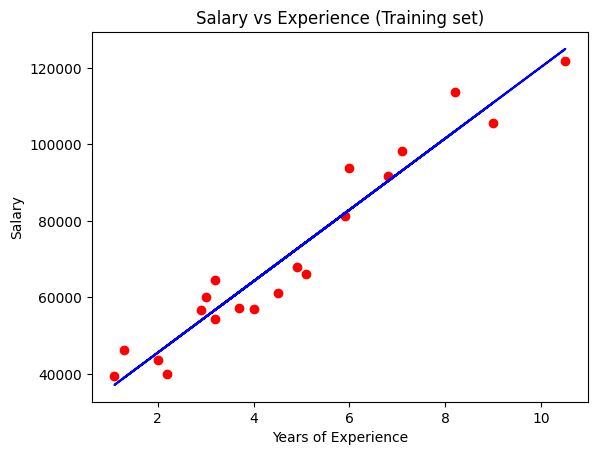

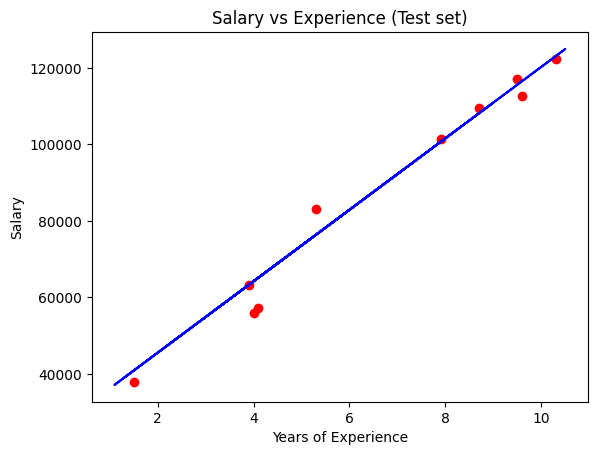

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Import the given "Salary_Data.csv" 
df = pd.read_csv(r"C:\Users\15014\Documents\GitHub\NNDL - assignment -4\Salary_Data.csv")
print("Dataset:\n", df)

# Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
print("Train Features:\n", X_train)
print("Train Labels:\n", y_train)
print("Test Features:\n", X_test)
print("Test Labels:\n", y_test)

# Train and predict the model 
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Predictions:\n", y_pred)

# Calculate the mean_squared_error 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize both train and test data using scatter plot 
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
